In [20]:
# Incantations to make graphs pretty
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 240

In [2]:
import re, nltk
import pandas as pd
from stop_words import get_stop_words

stopwords = get_stop_words('en')

---

# Words

In [3]:
# Ingest and listify the complete text of the story
text = open('texts/most_dangerous_game.txt', 'r').read()
words = re.sub("[^'a-zA-Z']"," ", text).lower().split()

# Get a word count 
# & check to see how things look by printing first 100 words
print("The text is {} words long and made up of {} unique word forms.".format(
    len(words), len(set(words))))
print(words[0:100])

The text is 8017 words long and made up of 1949 unique word forms.
['off', 'there', 'to', 'the', 'right', 'somewhere', 'is', 'a', 'large', 'island', 'said', 'whitney', "it's", 'rather', 'a', 'mystery', 'what', 'island', 'is', 'it', 'rainsford', 'asked', 'the', 'old', 'charts', 'call', 'it', "'ship", 'trap', 'island', "'", 'whitney', 'replied', 'a', 'suggestive', 'name', "isn't", 'it', 'sailors', 'have', 'a', 'curious', 'dread', 'of', 'the', 'place', 'i', "don't", 'know', 'why', 'some', 'superstition', "can't", 'see', 'it', 'remarked', 'rainsford', 'trying', 'to', 'peer', 'through', 'the', 'dank', 'tropical', 'night', 'that', 'was', 'palpable', 'as', 'it', 'pressed', 'its', 'thick', 'warm', 'blackness', 'in', 'upon', 'the', 'yacht', "you've", 'good', 'eyes', 'said', 'whitney', 'with', 'a', 'laugh', 'and', "i've", 'seen', 'you', 'pick', 'off', 'a', 'moose', 'moving', 'in', 'the', 'brown', 'fall']


There are a couple of ways to handle word frequencies: using a dictionary, using the NLTK -- `freq_dist = nltk.FreqDist(words)`, or using pandas. Pandas has an easy output to CSV, which I like to use to review word frequencies with students, so I'm using that here. But I use the NLTK for ngrams. 

In [5]:
series = pd.Series(words)
print(series[0:5])

0      off
1    there
2       to
3      the
4    right
dtype: object


In [7]:
frequencies = series.value_counts()
print(frequencies[0:10])

the          512
a            258
he           248
of           172
and          164
i            155
to           148
was          140
his          137
rainsford    117
dtype: int64


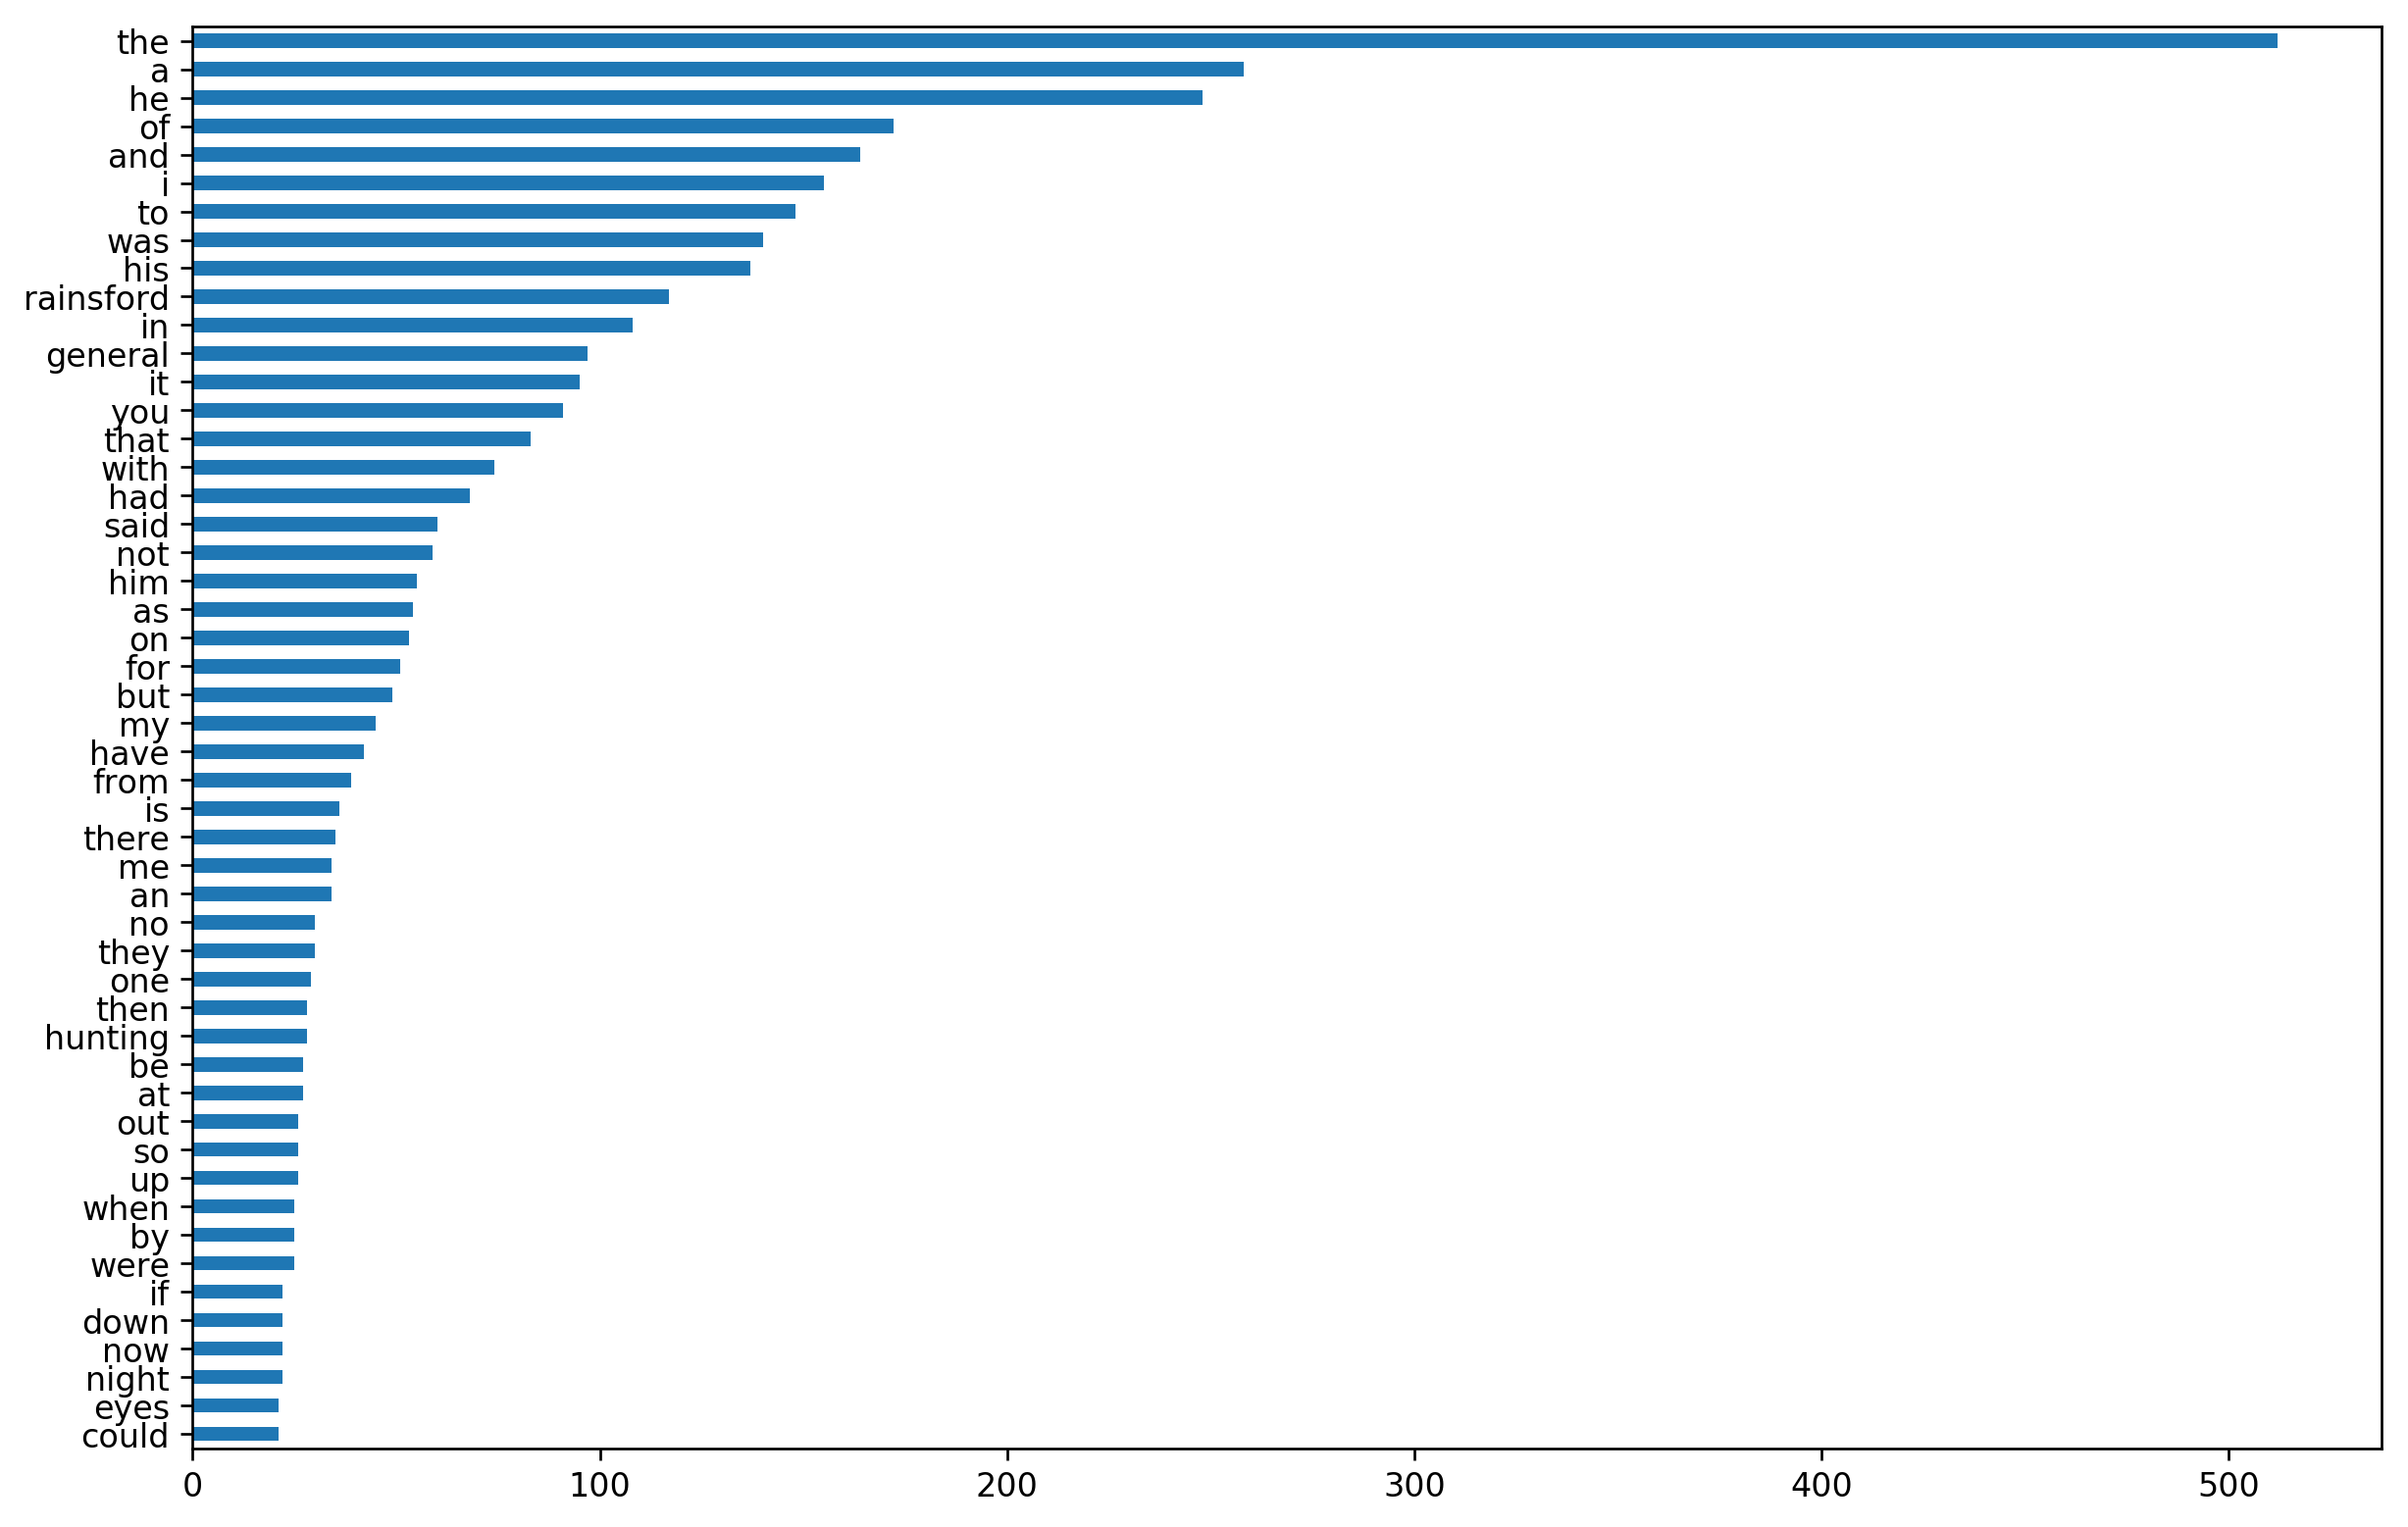

In [43]:
ax = frequencies.iloc[:50].plot(kind="barh")
ax.invert_yaxis()

In [36]:
frequencies.to_csv('mdg_word_freq.csv', header = False)

### Stopped Words

In [8]:
stopped = [word for word in words if word not in stopwords]
print(stopped[0:100])

['right', 'somewhere', 'large', 'island', 'said', 'whitney', 'rather', 'mystery', 'island', 'rainsford', 'asked', 'old', 'charts', 'call', "'ship", 'trap', 'island', "'", 'whitney', 'replied', 'suggestive', 'name', 'sailors', 'curious', 'dread', 'place', 'know', 'superstition', 'see', 'remarked', 'rainsford', 'trying', 'peer', 'dank', 'tropical', 'night', 'palpable', 'pressed', 'thick', 'warm', 'blackness', 'upon', 'yacht', 'good', 'eyes', 'said', 'whitney', 'laugh', 'seen', 'pick', 'moose', 'moving', 'brown', 'fall', 'bush', 'four', 'hundred', 'yards', 'even', 'see', 'four', 'miles', 'moonless', 'caribbean', 'night', 'four', 'yards', 'admitted', 'rainsford', 'ugh', 'like', 'moist', 'black', 'velvet', 'will', 'light', 'enough', 'rio', 'promised', 'whitney', 'make', 'days', 'hope', 'jaguar', 'guns', 'come', "purdey's", 'good', 'hunting', 'amazon', 'great', 'sport', 'hunting', 'best', 'sport', 'world', 'agreed', 'rainsford', 'hunter', 'amended']


In [9]:
stopped_series = pd.Series(stopped)
stopped_freq = stopped_series.value_counts()
stopped_freq.to_csv('mdg_lex_freq.csv', header = False)

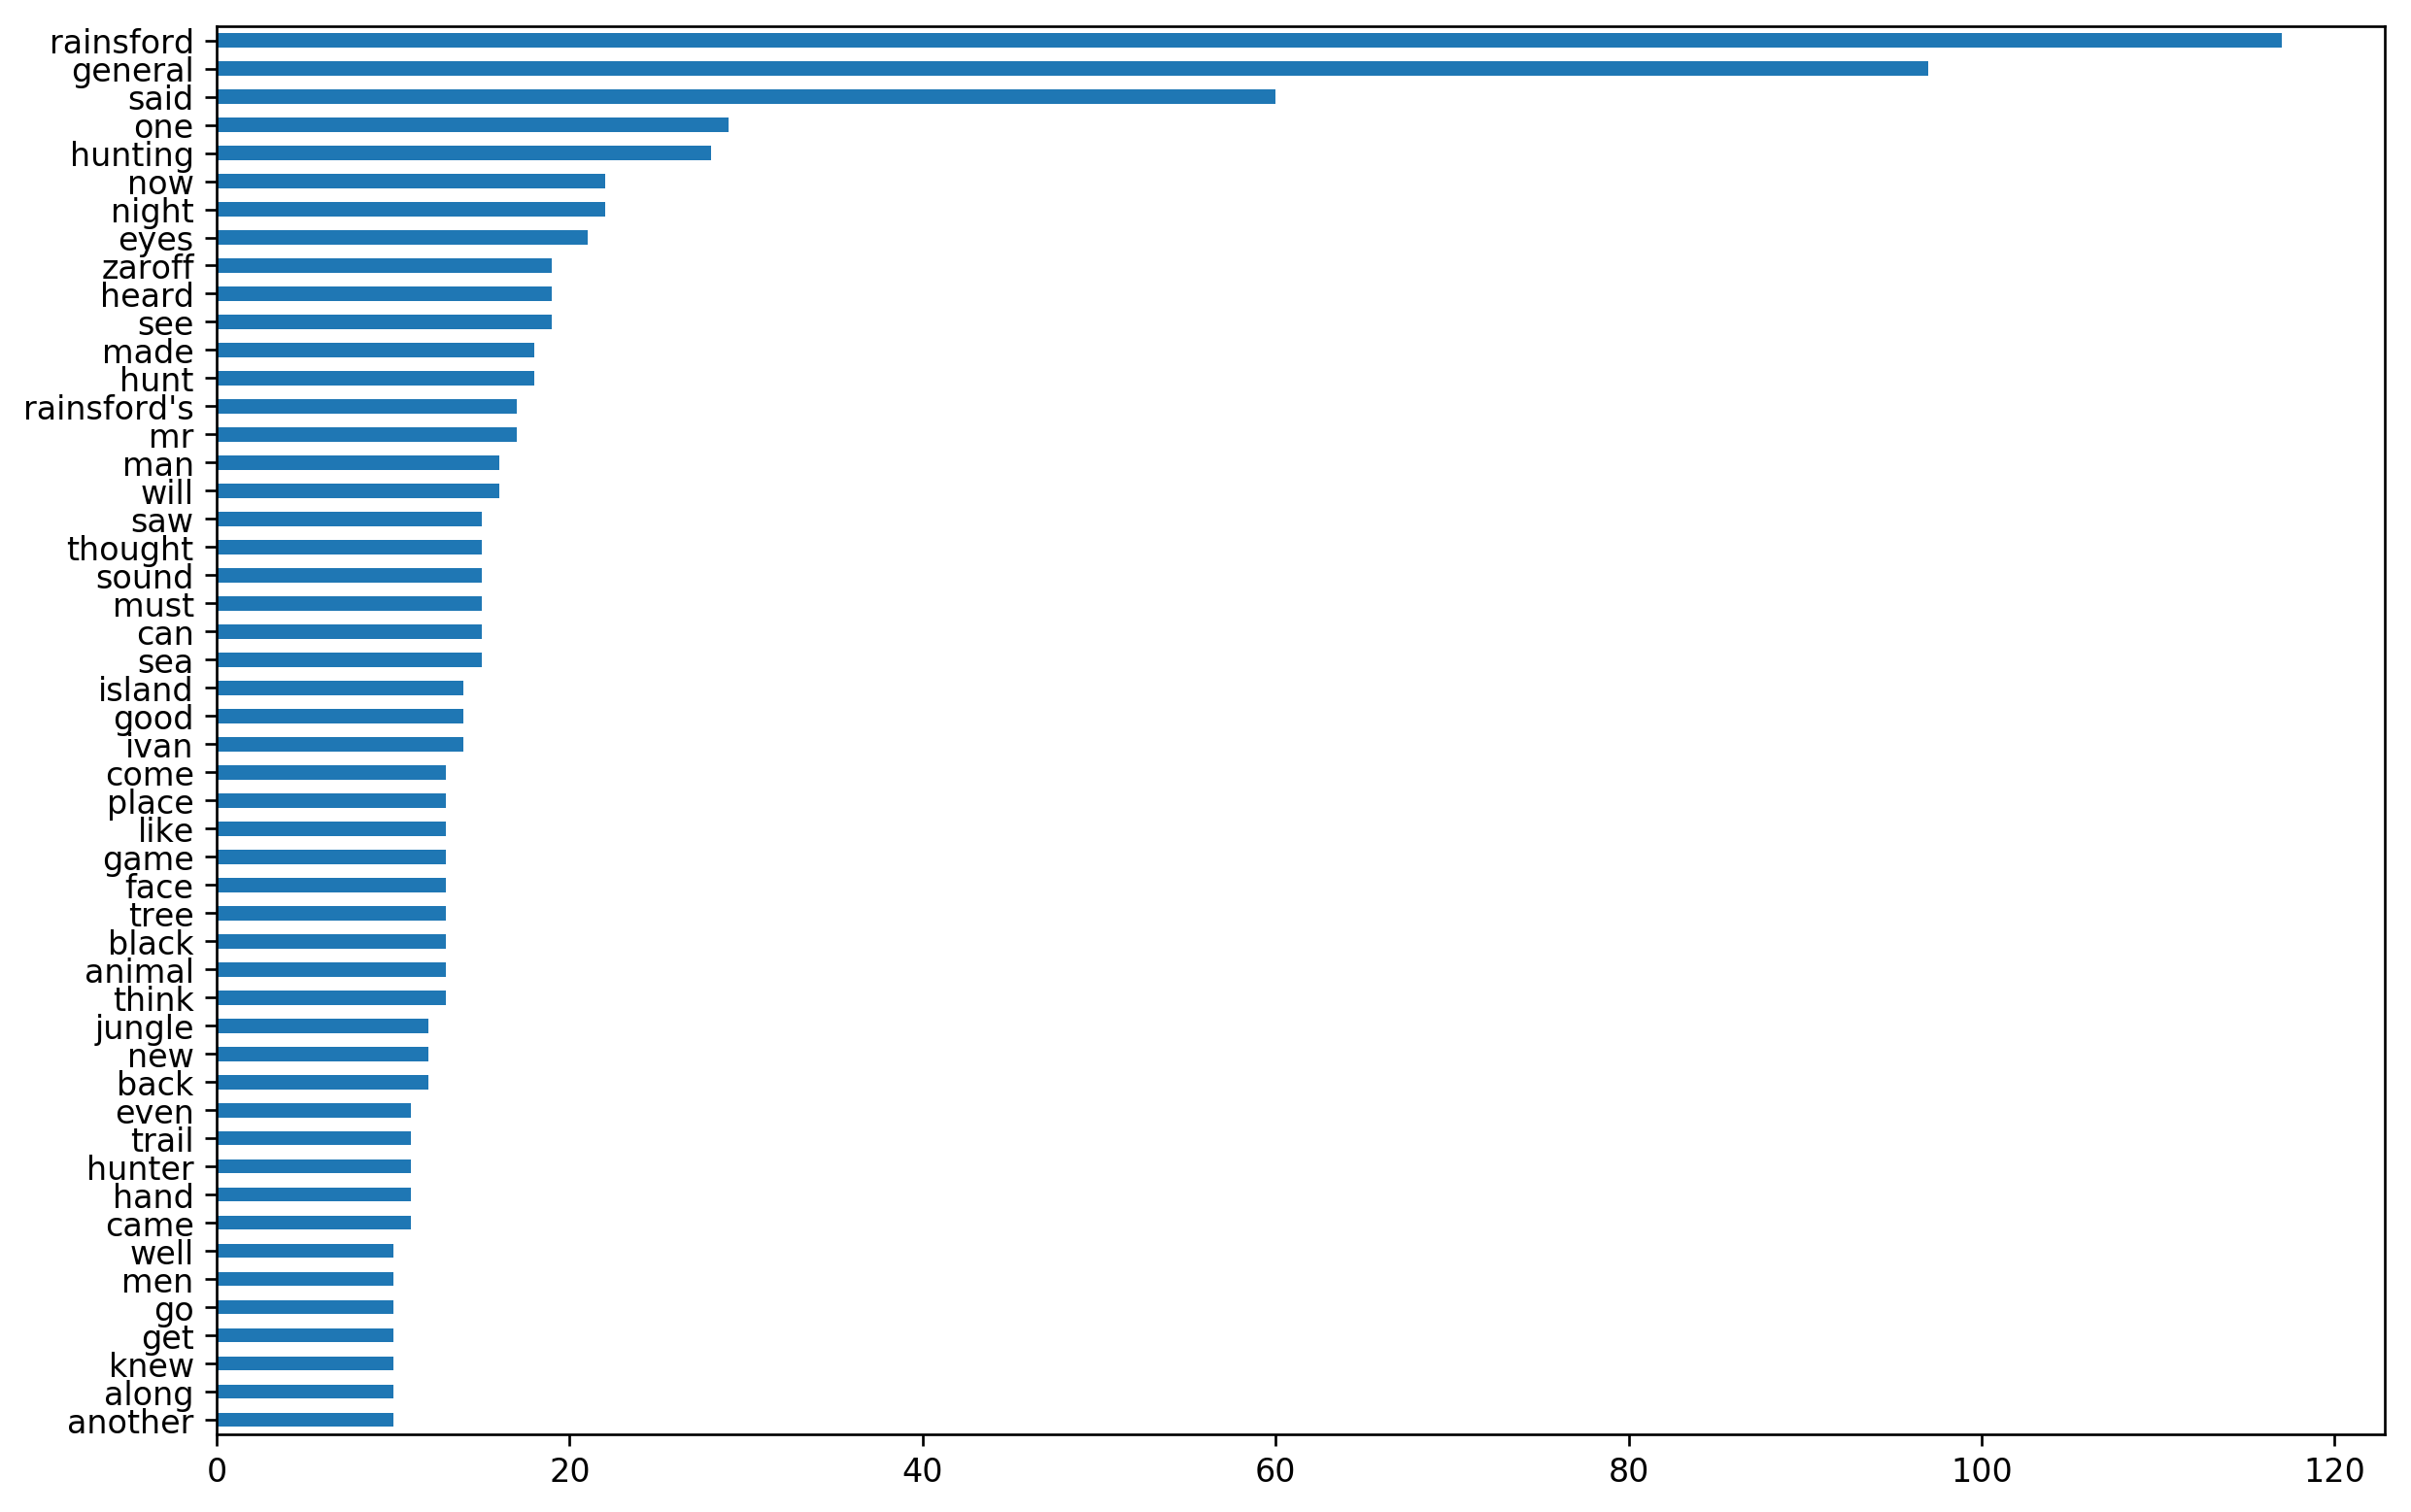

In [44]:
ax2 = stopped_freq.iloc[:50].plot(kind="barh")
ax2.invert_yaxis()

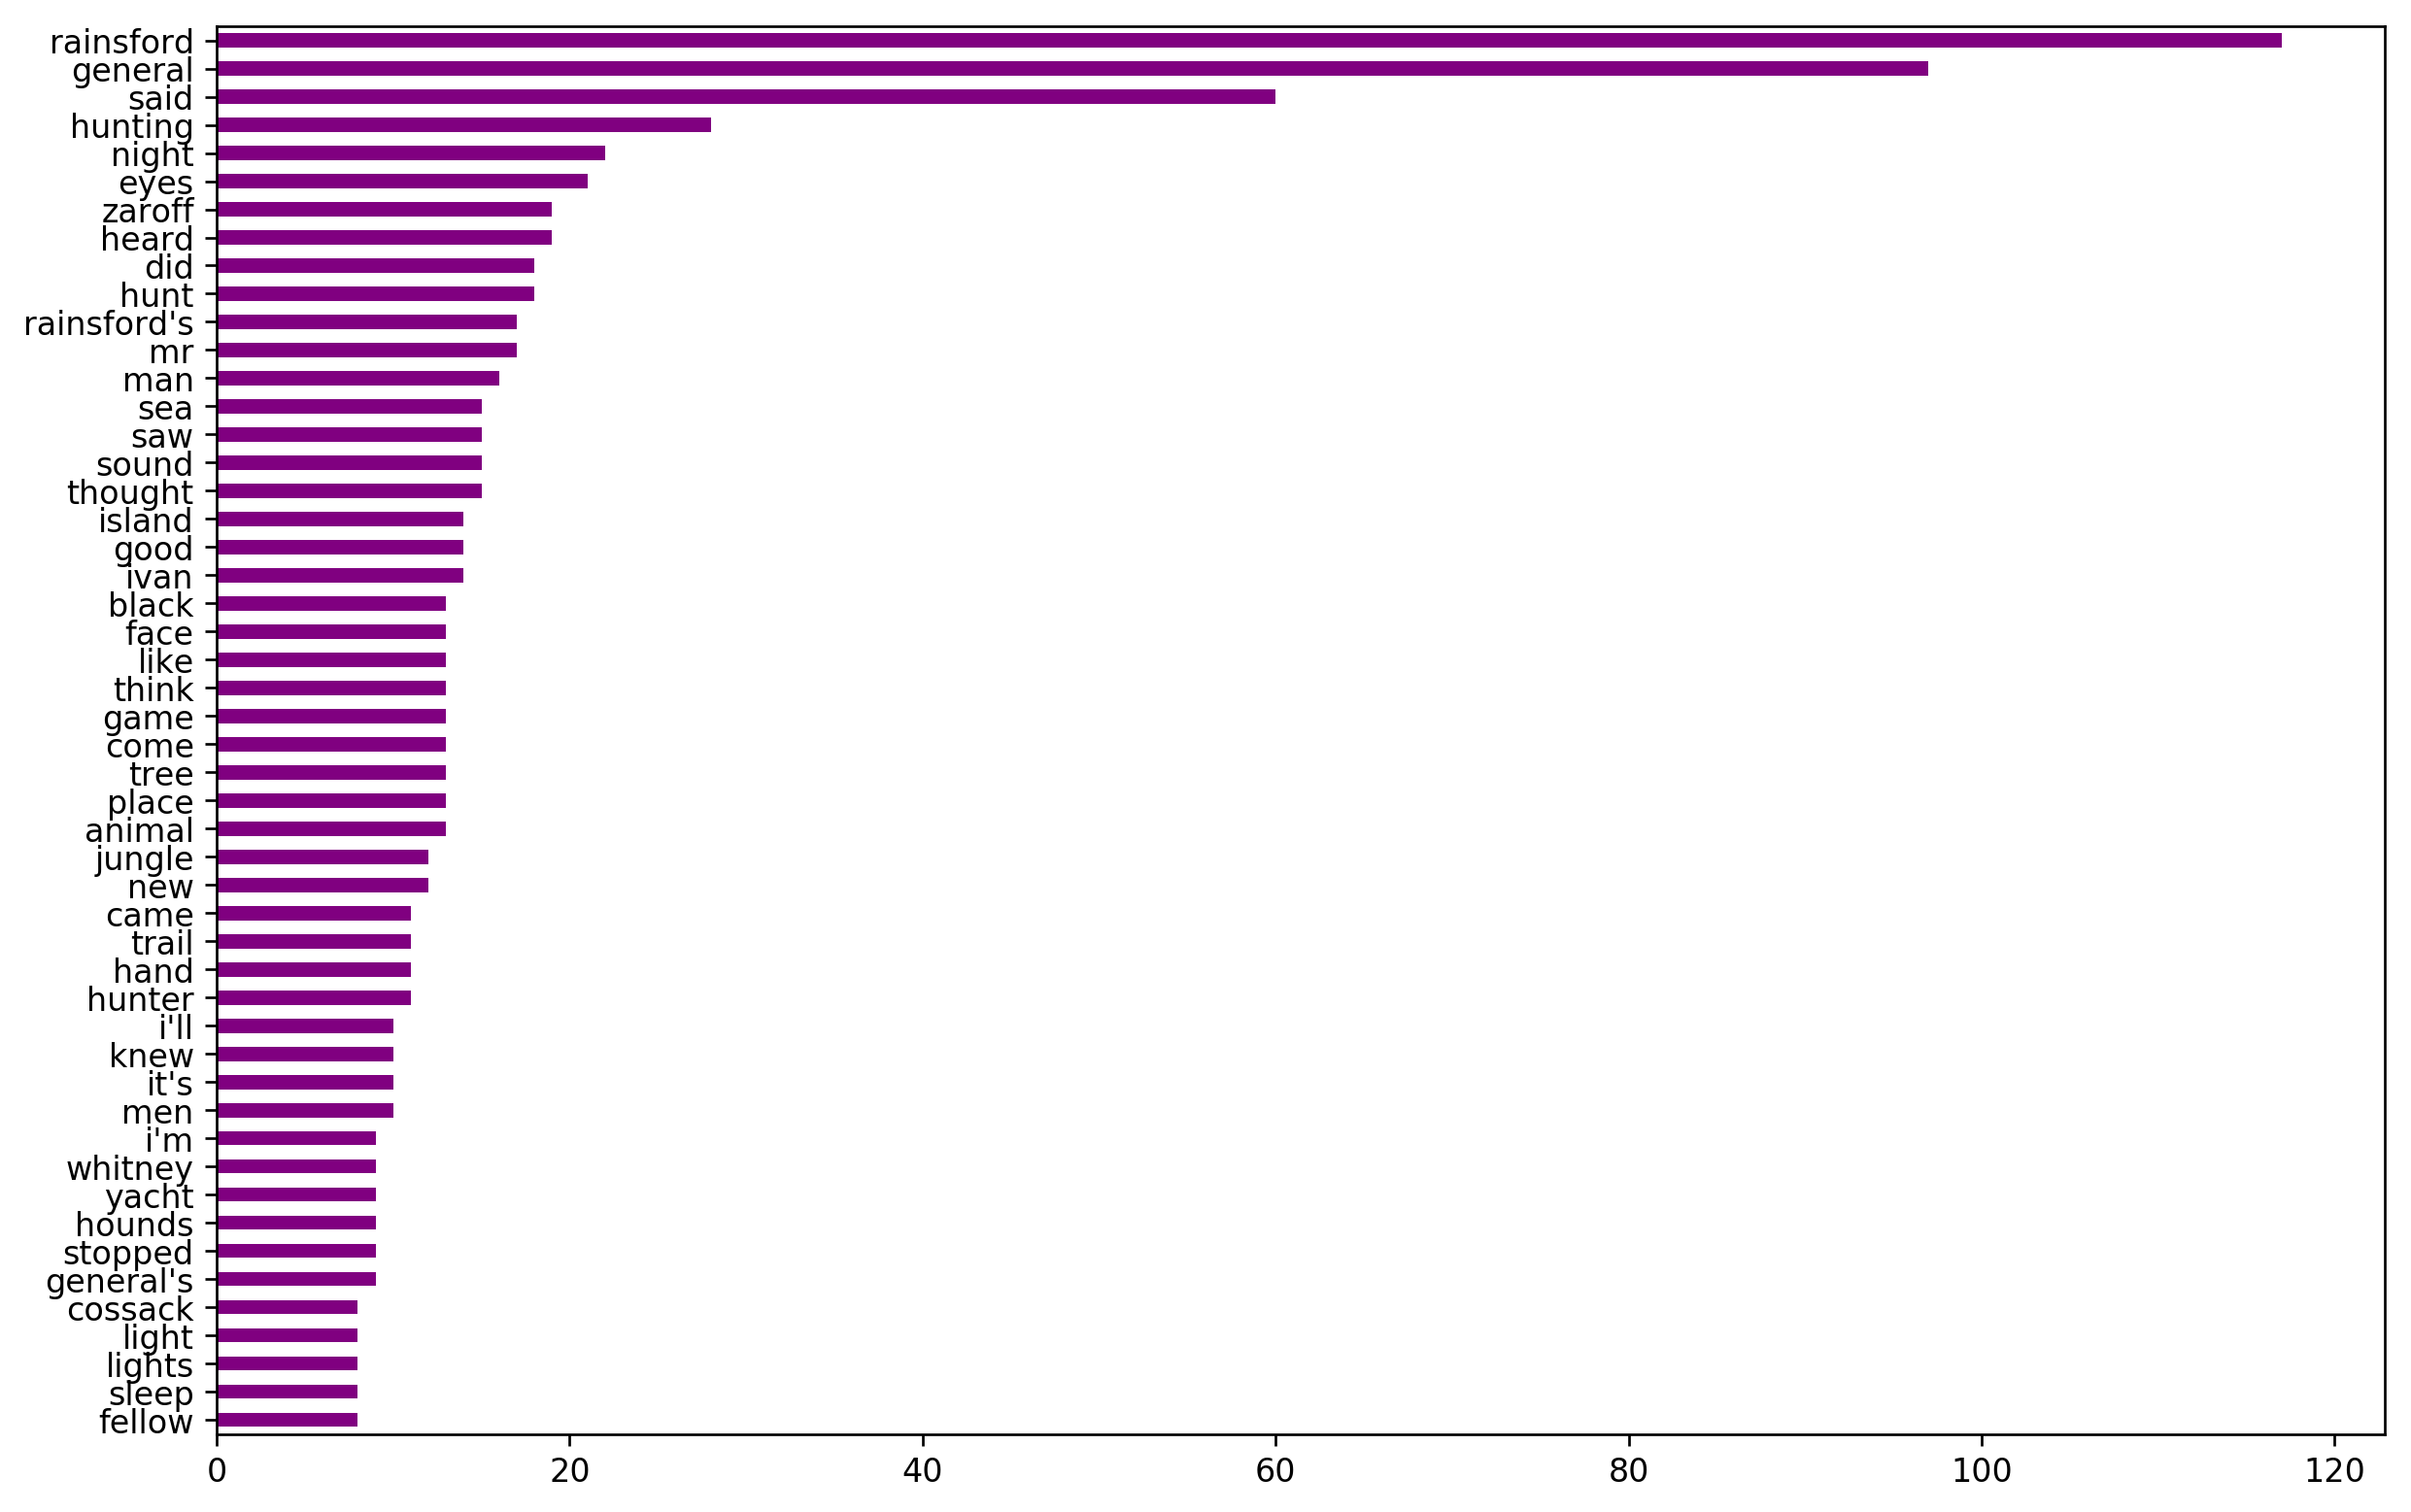

In [94]:
from sklearn.feature_extraction import stop_words
sklearn_stop = stop_words.ENGLISH_STOP_WORDS
sk_stop = [word for word in words if word not in sklearn_stop]
sk_stop_series = pd.Series(sk_stop)
sk_stop_freq = sk_stop_series.value_counts()
ax3 = sk_stop_freq.iloc[:50].plot(kind="barh", color = 'purple')
ax3.invert_yaxis()

---

## Ngrams

In [48]:
all_counts = dict()
for size in 2, 3, 4, 5:
    all_counts[size] = nltk.FreqDist(nltk.ngrams(stopped, size))

### Bigrams

In [49]:
all_counts[2].most_common(20)

[(('general', 'zaroff'), 19),
 (('said', 'general'), 17),
 (('mr', 'rainsford'), 15),
 (('said', 'rainsford'), 13),
 (('general', 'smiled'), 5),
 (('general', 'said'), 5),
 (('big', 'game'), 4),
 (('night', 'rainsford'), 4),
 (('cape', 'buffalo'), 4),
 (('rainsford', 'general'), 4),
 (('window', 'looked'), 4),
 (('rainsford', 'knew'), 4),
 (('good', 'night'), 3),
 (('rainsford', 'see'), 3),
 (('sanger', 'rainsford'), 3),
 (('rainsford', 'saw'), 3),
 (('new', 'animal'), 3),
 (('oh', 'said'), 3),
 (('dear', 'fellow'), 3),
 (('young', 'man'), 3)]

### Trigrams

In [51]:
all_counts[3].most_common(10)

[(('oh', 'said', 'general'), 3),
 (('went', 'window', 'looked'), 3),
 (('sanger', 'rainsford', 'new'), 2),
 (('rainsford', 'new', 'york'), 2),
 (('man', 'general', 'zaroff'), 2),
 (('said', 'general', 'zaroff'), 2),
 (('cape', 'buffalo', 'dangerous'), 2),
 (('buffalo', 'dangerous', 'big'), 2),
 (('dangerous', 'big', 'game'), 2),
 (('mr', 'rainsford', 'general'), 2)]

### 4grams

In [53]:
all_counts[4].most_common(5)

[(('sanger', 'rainsford', 'new', 'york'), 2),
 (('cape', 'buffalo', 'dangerous', 'big'), 2),
 (('buffalo', 'dangerous', 'big', 'game'), 2),
 (('rainsford', 'dear', 'fellow', 'said'), 2),
 (('dear', 'fellow', 'said', 'general'), 2)]

### 5grams

In [54]:
all_counts[5].most_common(5)

[(('cape', 'buffalo', 'dangerous', 'big', 'game'), 2),
 (('rainsford', 'dear', 'fellow', 'said', 'general'), 2),
 (('right', 'somewhere', 'large', 'island', 'said'), 1),
 (('somewhere', 'large', 'island', 'said', 'whitney'), 1),
 (('large', 'island', 'said', 'whitney', 'rather'), 1)]

---

## Sentences

In [72]:
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(text)
print(f'There are {len(sentences)} sentences in the text. The first five are: {sentences[0:5]}.')

There are 701 sentences in the text. The first five are: ['"Off there to the right -- somewhere -- is a large island," said Whitney.', '"It\'s rather a mystery -- "\n"What island is it?"', 'Rainsford asked.', '"The old charts call it \'Ship-Trap Island,\'" Whitney replied.', '"A suggestive name, isn\'t it?'].


In [70]:
sentences_re =  [re.sub("[^'a-zA-Z']"," ", sentence).lower().split() for sentence in sentences]
print(sentences_re[0:5])

[['off', 'there', 'to', 'the', 'right', 'somewhere', 'is', 'a', 'large', 'island', 'said', 'whitney'], ["it's", 'rather', 'a', 'mystery', 'what', 'island', 'is', 'it'], ['rainsford', 'asked'], ['the', 'old', 'charts', 'call', 'it', "'ship", 'trap', 'island', "'", 'whitney', 'replied'], ['a', 'suggestive', 'name', "isn't", 'it']]


In [73]:
sentence_lengths = [len(re.sub("[^'a-zA-Z']"," ", sentence).lower().split())
                   for sentence in sentences]
print(sentence_lengths[0:5])

[12, 8, 2, 11, 5]


So right away, we have a problem. The NLTK sentence tokenizer is confused about the beginning and end of two of our first three sentences:

> "Off there to the right -- somewhere -- is a large island," said Whitney. "It's rather a mystery -- "  
> "What island is it?" Rainsford asked.  

As readers, we recognize that there are three sentences here as follows:

1. "Off there to the right -- somewhere -- is a large island," said Whitney. 
2. "It's rather a mystery -- "
3. "What island is it?" Rainsford asked.

The NLTK see these three sentences:

1. "Off there to the right -- somewhere -- is a large island," said Whitney. 
2. "It's rather a mystery -- " "What island is it?" 
3. Rainsford asked.

Given how dialogue heavy the story is, as we demonstrate in a moment, this throws the following distribution of sentence lengths into question.

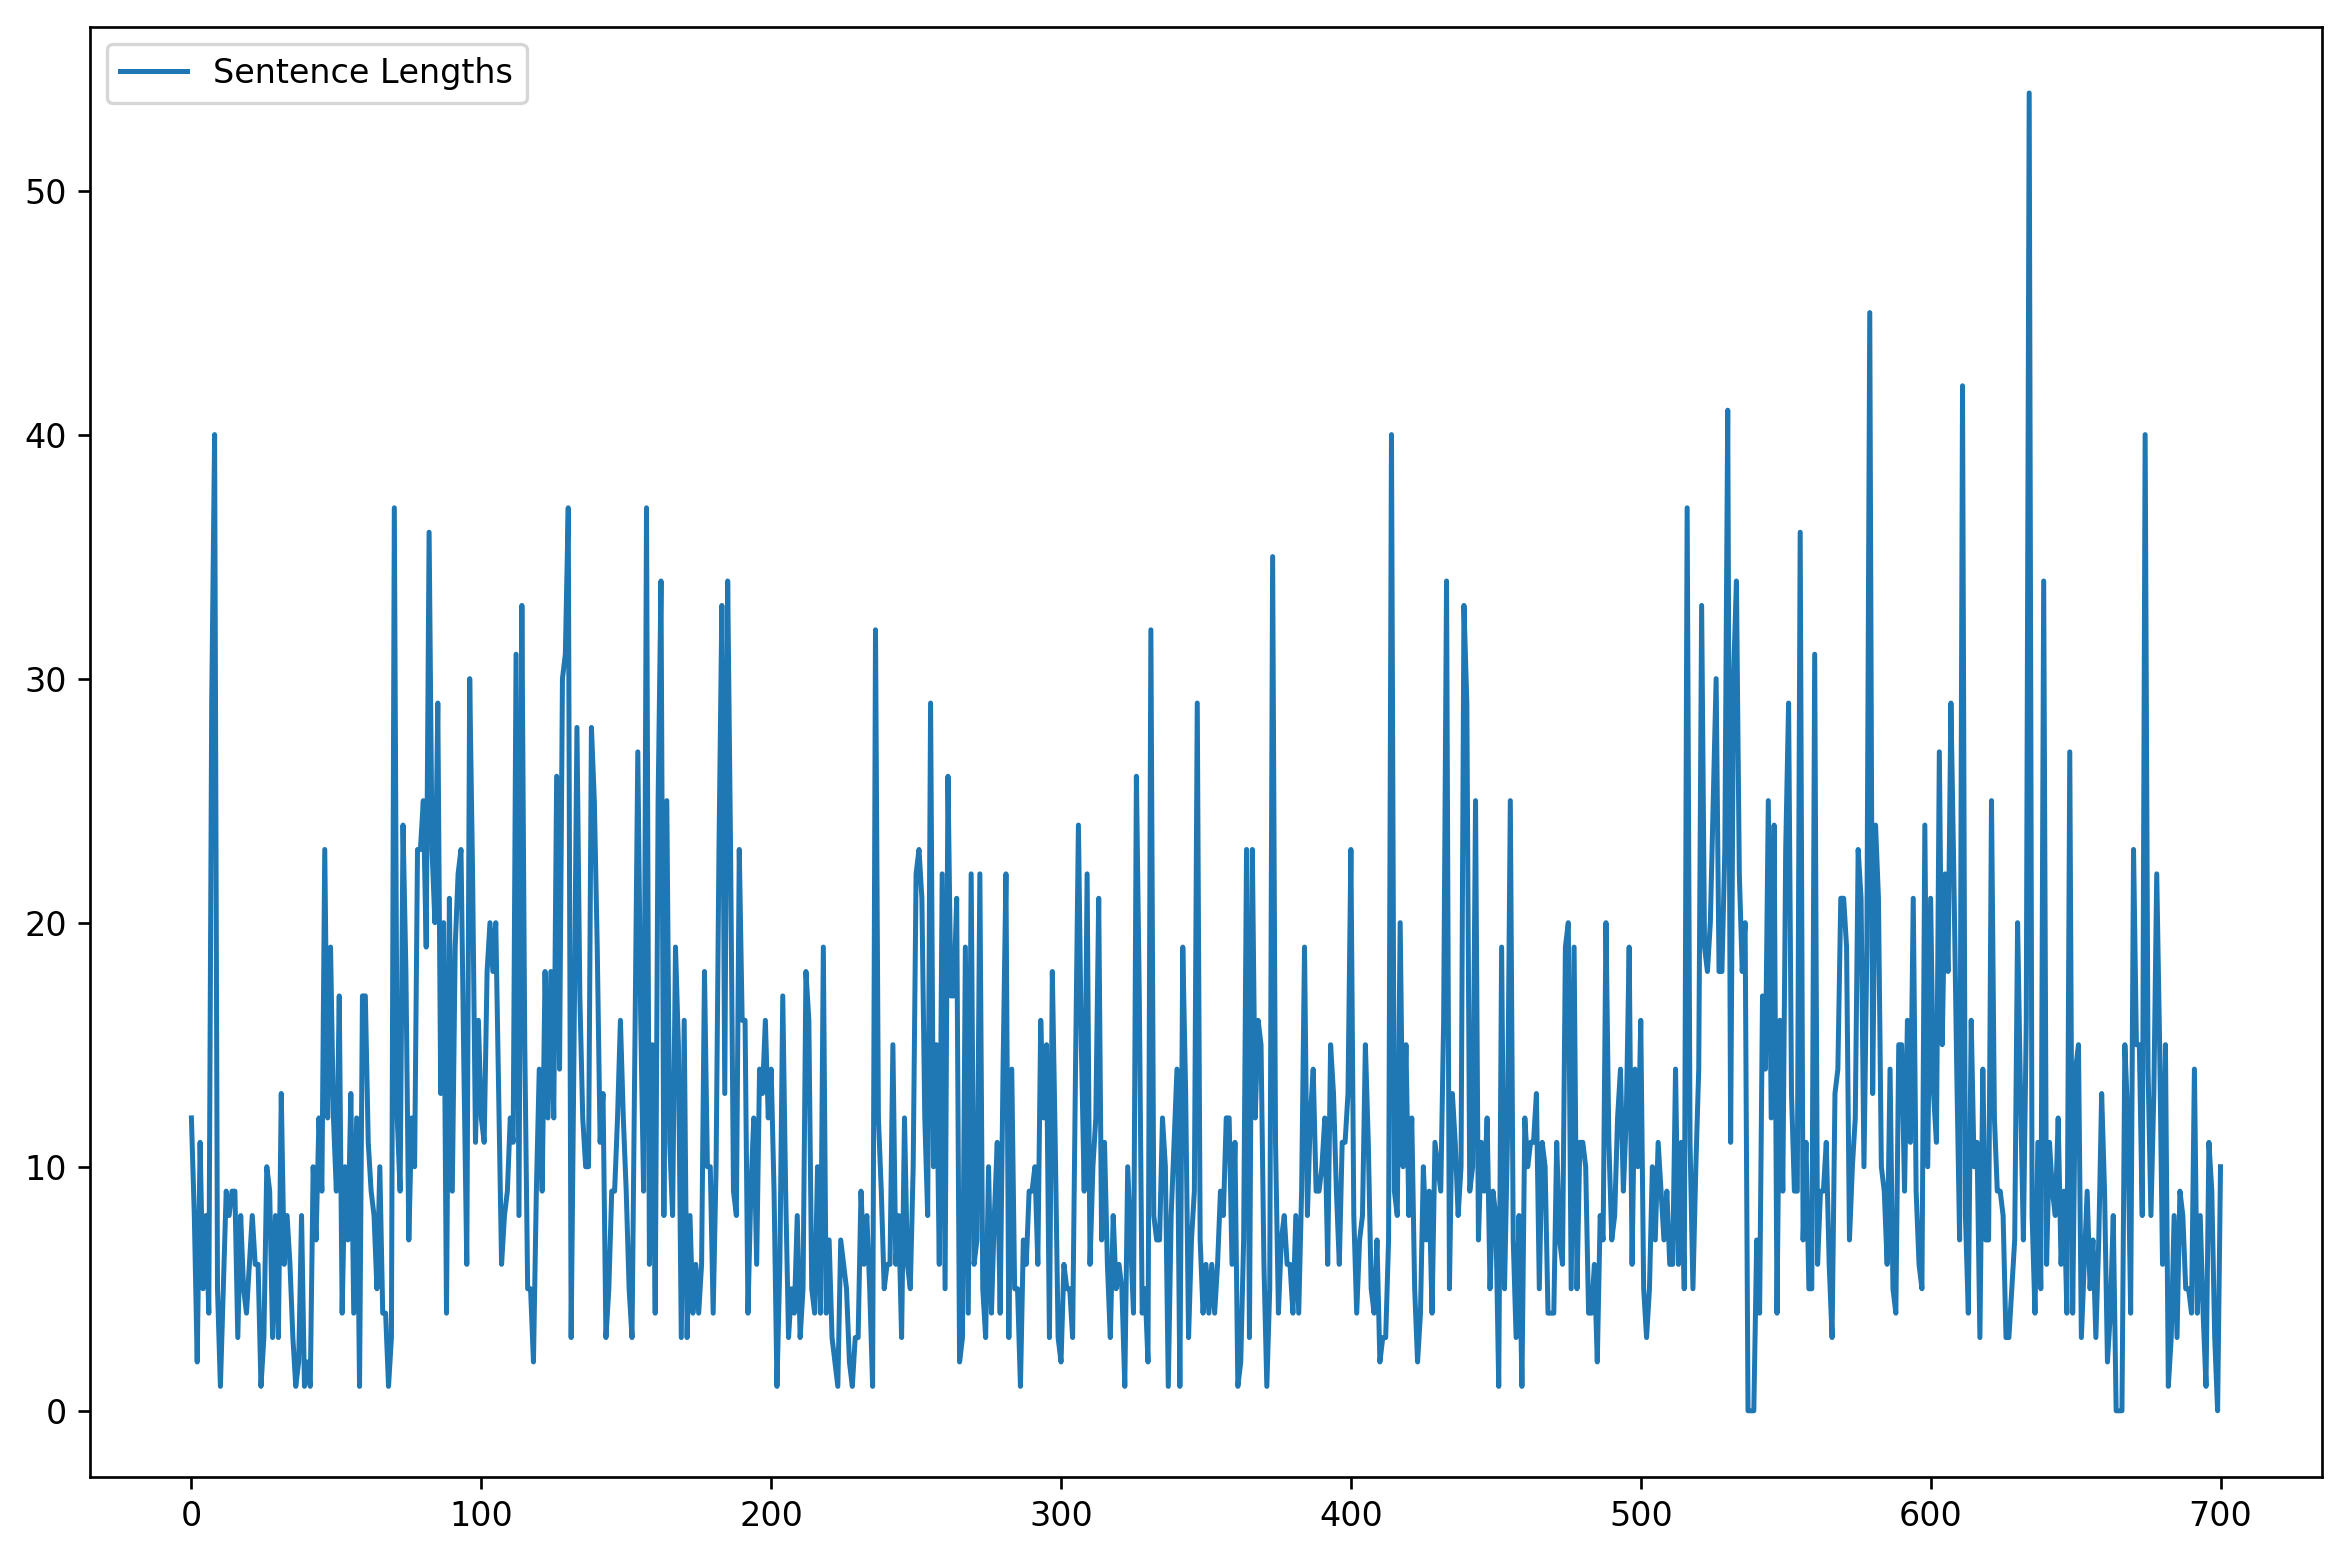

In [92]:
plt.plot(sentence_lengths, label = "Sentence Lengths")
plt.legend()
plt.show()

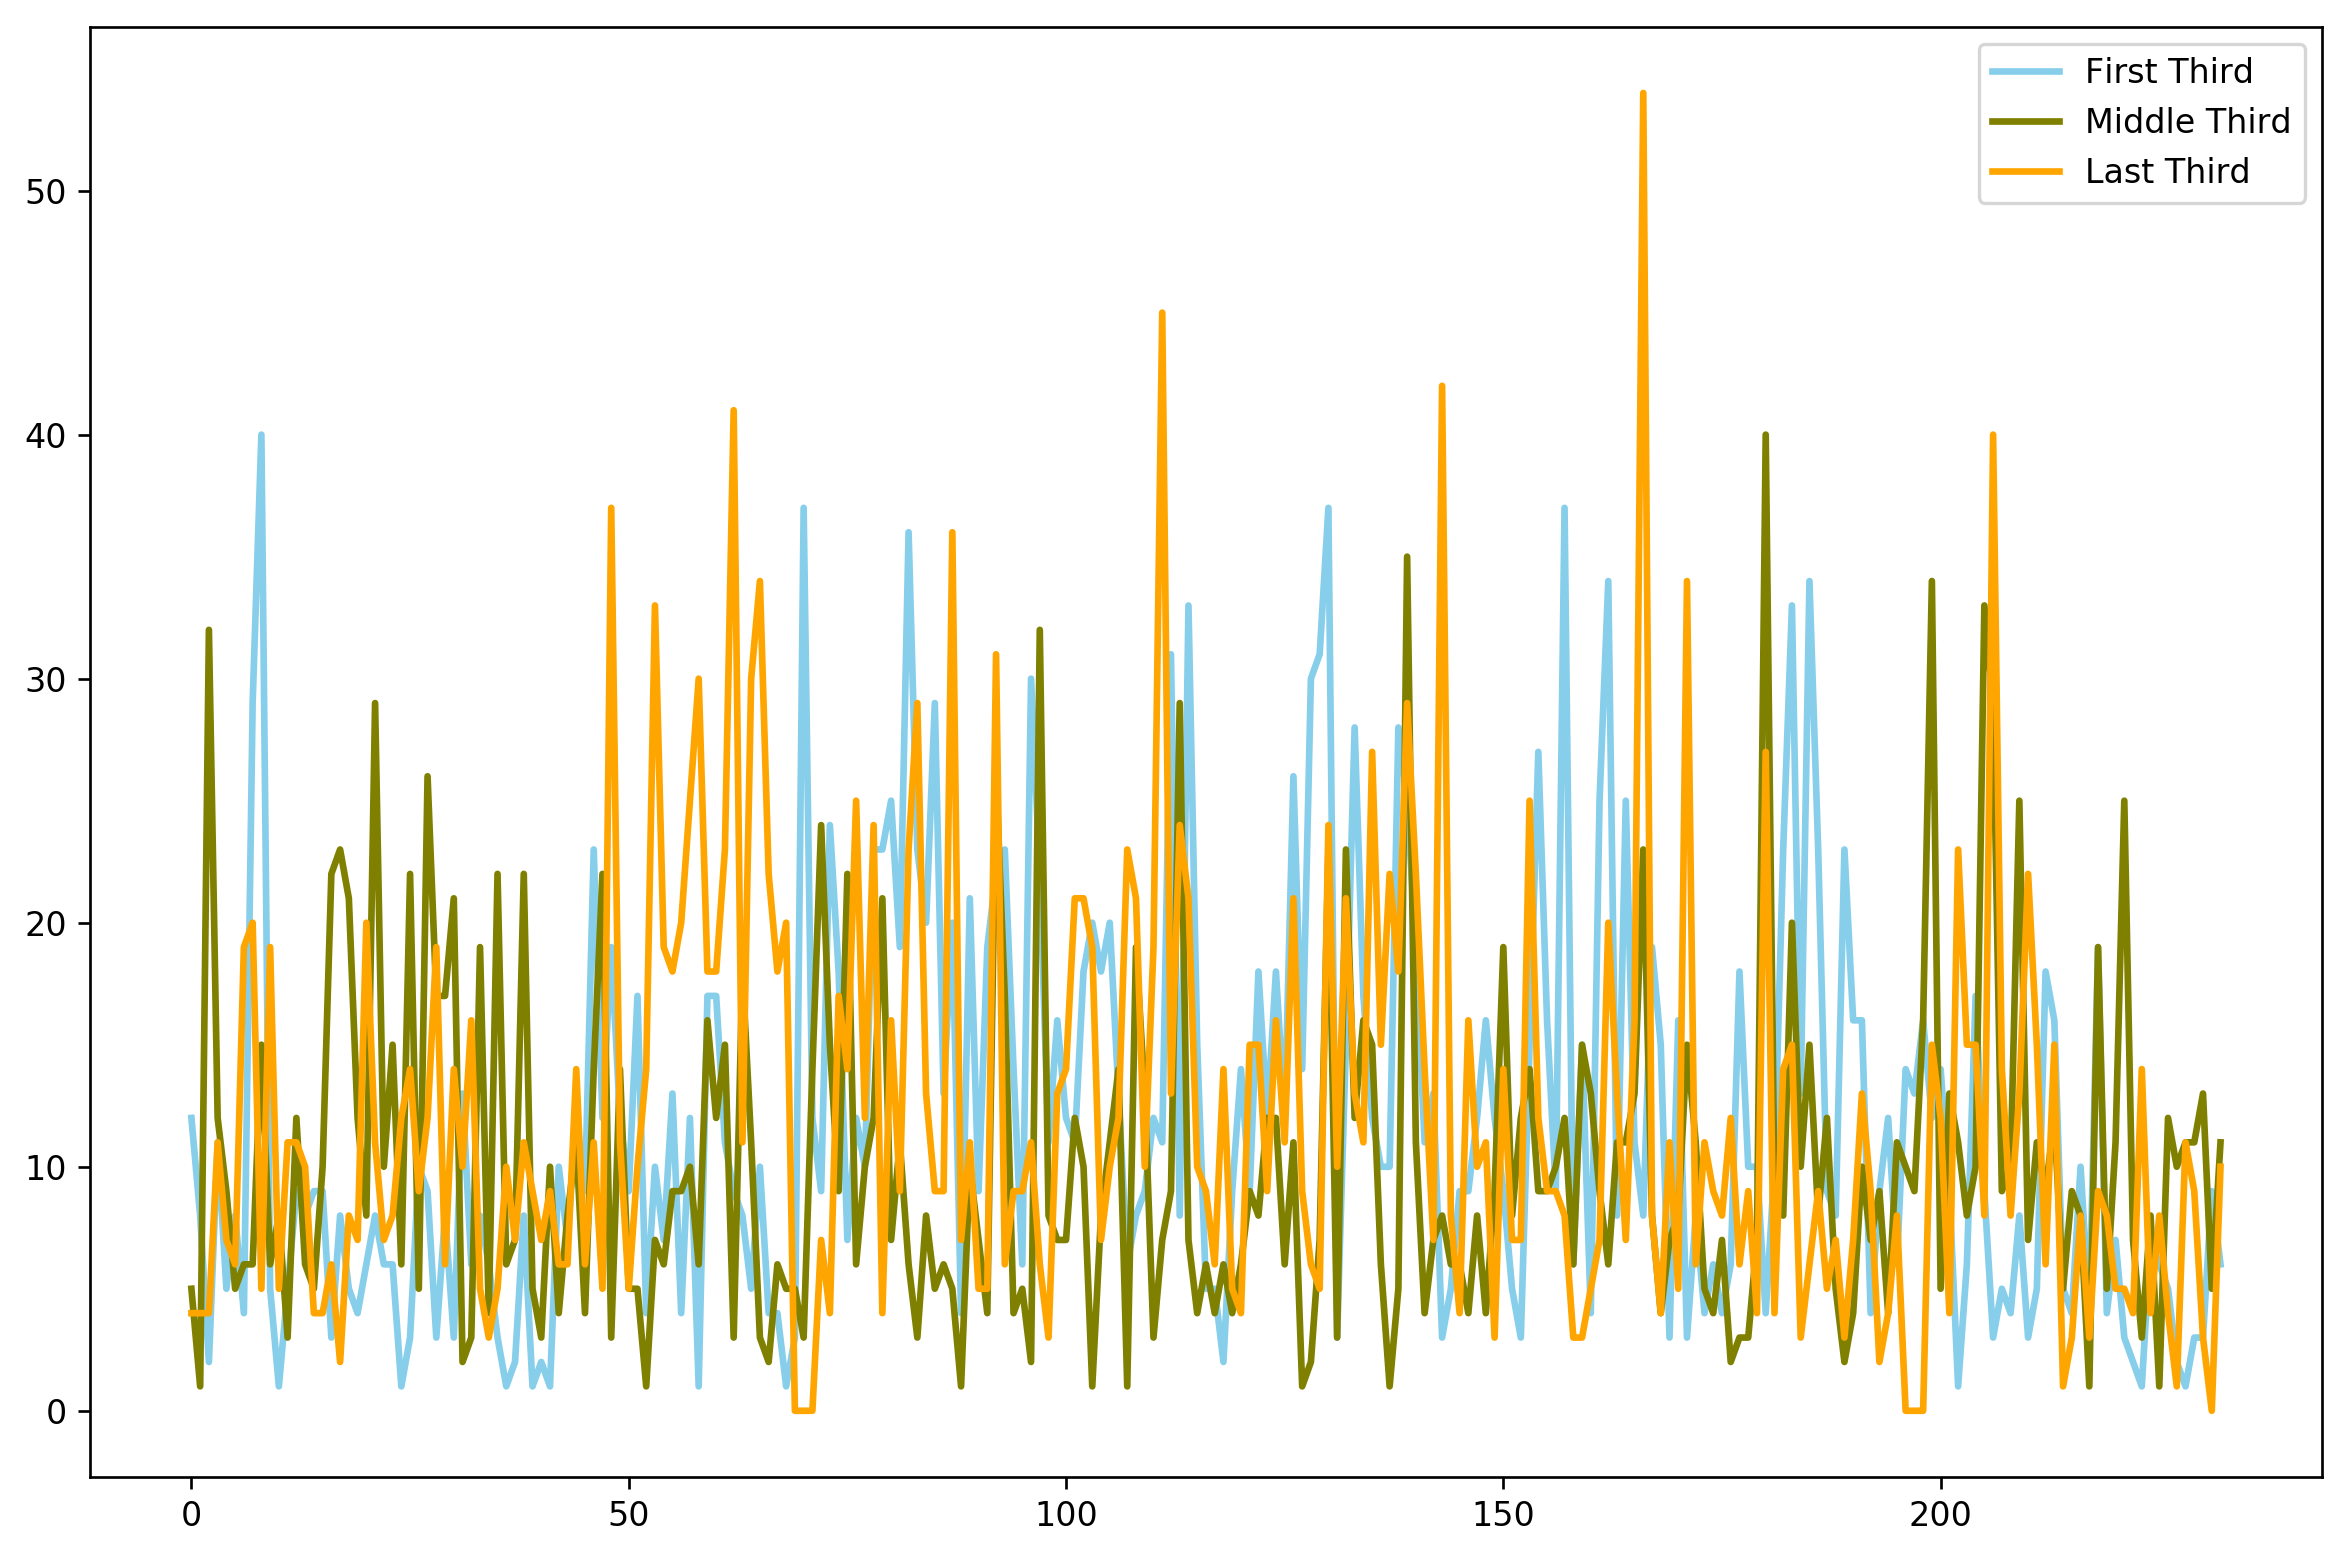

In [93]:
x = range(0, 233)
y1 = sentence_lengths[0:233]
y2 = sentence_lengths[234:467]
y3 = sentence_lengths[468:701]
plt.plot( x, y1, color='skyblue', linewidth=2, label="First Third")
plt.plot( x, y2, color='olive', linewidth=2, label="Middle Third")
plt.plot (x, y3, color='orange', linewidth=2, label="Last Third")
plt.legend()
plt.show()

---

## Paragraphs

In [95]:
paragraphs = text.splitlines()
print(f'This text has {len(paragraphs)} paragraphs.')
print(paragraphs[0:5])

This text has 206 paragraphs.
['"Off there to the right -- somewhere -- is a large island," said Whitney. "It\'s rather a mystery -- "', '"What island is it?" Rainsford asked.', '"The old charts call it \'Ship-Trap Island,\'" Whitney replied. "A suggestive name, isn\'t it? Sailors have a curious dread of the place. I don\'t know why. Some superstition -- "', '"Can\'t see it," remarked Rainsford, trying to peer through the dank tropical night that was palpable as it pressed its thick warm blackness in upon the yacht.', '"You\'ve good eyes," said Whitney, with a laugh, "and I\'ve seen you pick off a moose moving in the brown fall bush at four hundred yards, but even you can\'t see four miles or so through a moonless Caribbean night."']


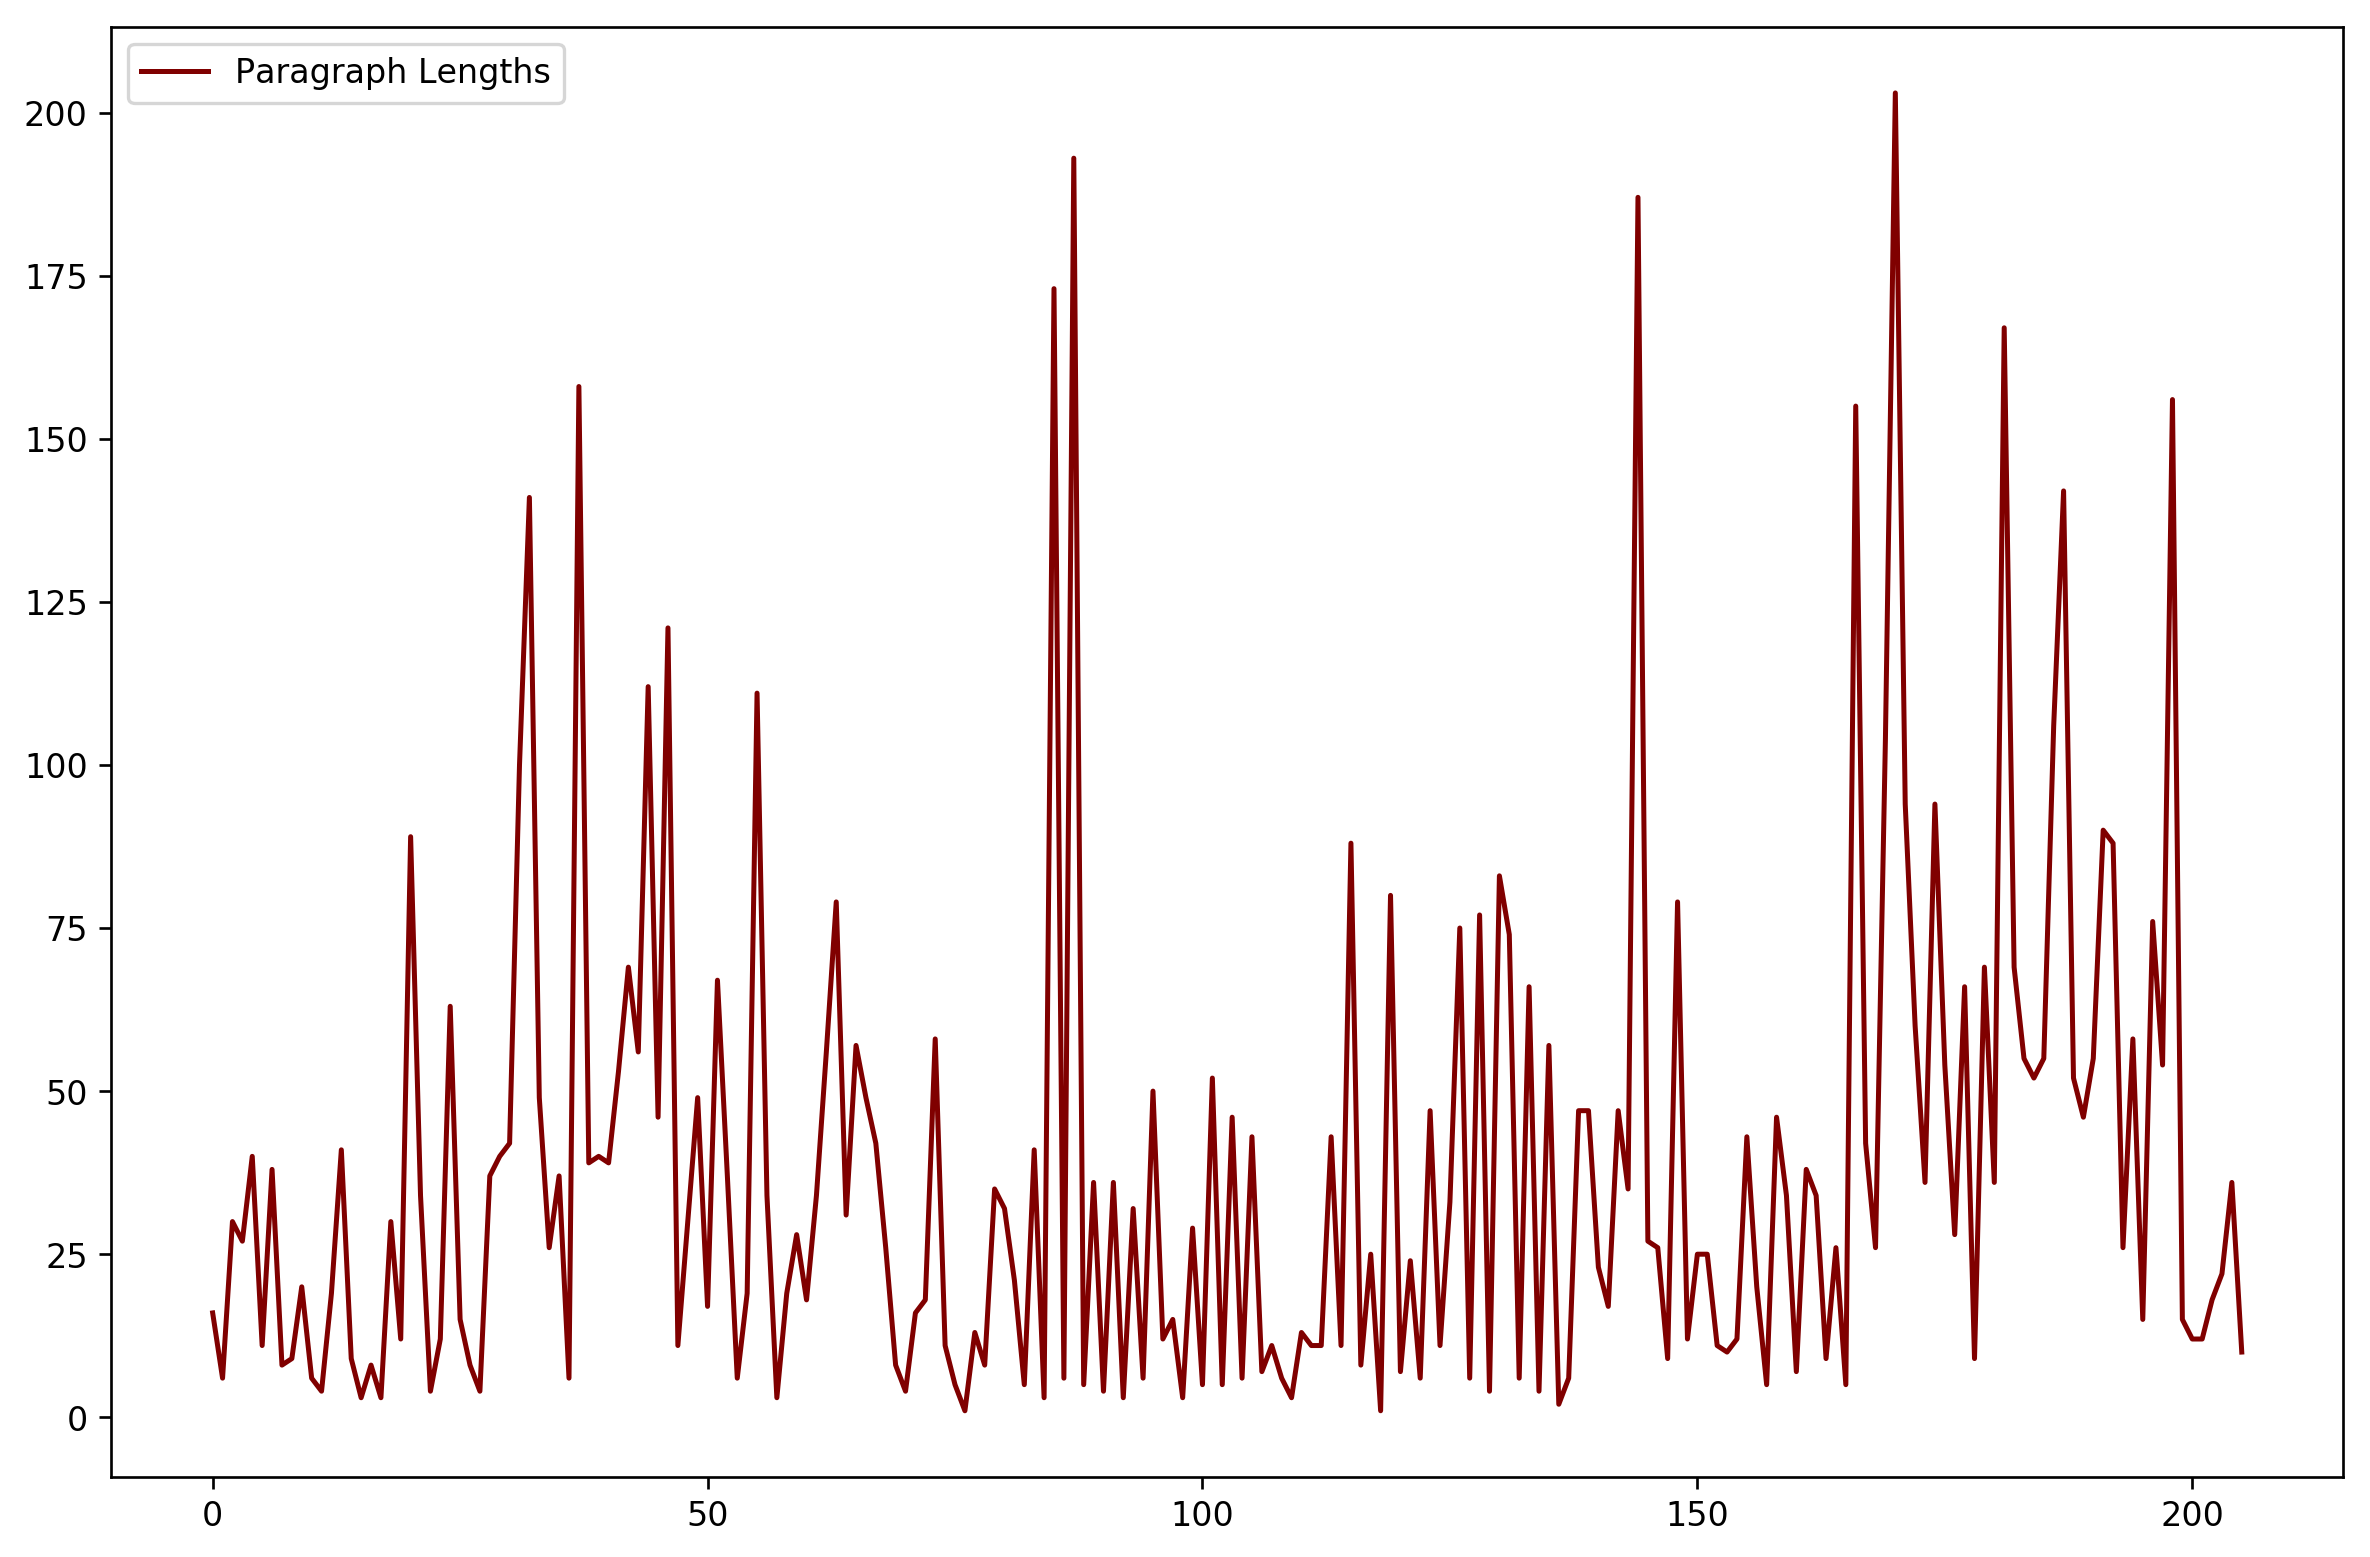

In [97]:
p_lengths = [len(re.sub("[^'a-zA-Z']"," ", p).lower().split()) for p in paragraphs]
plt.plot(p_lengths, label = "Paragraph Lengths", color = 'maroon')
plt.legend()
plt.show()